<a href="https://colab.research.google.com/github/DendaRaniaRatu/Mechine-Learning_Week7/blob/main/Homework_Week7_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install XGBoost

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
numSamples, numFeatures = iris.data.shape
print(numSamples)
print(numFeatures)

150
4


In [15]:
iris.data.shape

(150, 4)

In [16]:
print (iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [17]:
print(list(iris.target_names))

['setosa', 'versicolor', 'virginica']


In [18]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

In [20]:
import xgboost as xgb

train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

In [21]:
param = {
   'max_depth' :4,		          	#kedalaman tree
   'eta':0.3,			              	#learning rate
   'objective' : 'multi:softmax',	#untuk kasus multiple class
   'num_class':3}		            	#3 jenis target, sesuai jenis bunga, 0, 1, 2
epochs = 10  #jumlah iterasi

In [22]:
model = xgb.train(param, train, epochs)

In [23]:
predictions = model.predict(test)
print(predictions)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

1.0

In [25]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, predictions)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


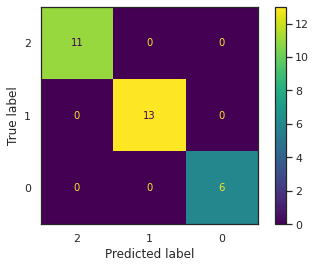

In [26]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
			       display_labels=y_test)
disp.plot()
plt.show()